In [69]:
import numpy as np
import scipy 
import pandas as pd
import matplotlib.pyplot as plt
import sys
from numpy import linalg
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy import stats
# from mayavi import mlab
import seaborn as sns
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import uniform
import seaborn as sns
from scipy.stats import gaussian_kde
import matplotlib.patches as patches

def get_distribution_object(id = 1):
    d_dict = {}
    d_dict[1] = {
        'x': gamma(a = 2, loc= 1.0, scale=0.5),
        'y': gamma(a = 1, loc=-1.0, scale=0.75),
    }
    d_dict[2] = {
        'x': gamma(a = 1.0, loc = -1.5, scale=0.5),
        'y': gamma(a = 2.0, loc = 1.50, scale=0.5),
       
    }
    d_dict[3] = {
        'x': norm(loc = 1.25, scale =0.25),
        'y': norm(loc = 2.75, scale =0.25),
        
    }
    return d_dict[id]


def sample_from_dist(id = 1, size=500):
    obj = get_distribution_object(id)
    x = obj['x'].rvs(size=size)
    y = obj['y'].rvs(size=size)
    xy= np.vstack([x,y]).transpose()
    return xy


In [60]:
X1 = sample_from_dist(id = 1,size = 1000)
X2 = sample_from_dist(id = 2,size = 1000)
X3 = sample_from_dist(id = 3,size = 200)

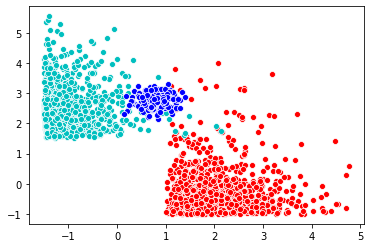

In [57]:
sns.scatterplot(X1[:,0],X1[:,1], color = 'r')
sns.scatterplot(X2[:,0],X2[:,1], color = 'c')
sns.scatterplot(X3[:,0],X3[:,1], color = 'b')

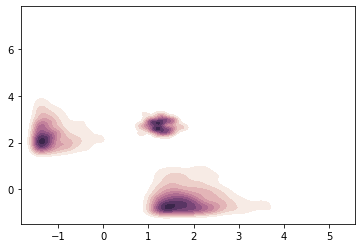

In [65]:
cmap = sns.cubehelix_palette(light=1.05, as_cmap=True)
sns.kdeplot(X1[:,0], X1[:,1], cmap=cmap, shade=True)
cmap = sns.cubehelix_palette(light=1.05, as_cmap=True)
sns.kdeplot(X2[:,0], X2[:,1], cmap=cmap, shade=True)
cmap = sns.cubehelix_palette(light=1.05, as_cmap=True)
sns.kdeplot(X3[:,0], X3[:,1], cmap=cmap, shade=True)

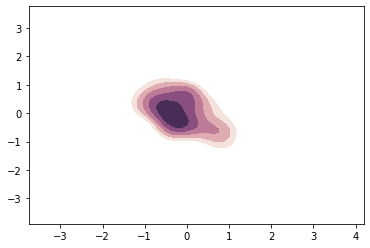

In [23]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=2, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

In [30]:
X4 = np.vstack([X1,X2,X3])

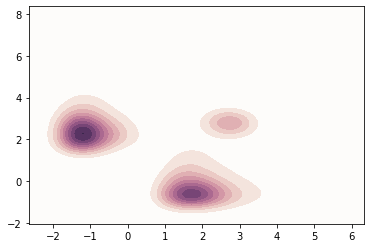

In [32]:
cmap = sns.cubehelix_palette(light=1.025, as_cmap=True)
sns.kdeplot(X4[:,0], X4[:,1], cmap=cmap, shade=True)

/home/ddatta/anaconda3/envs/SG/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
/home/ddatta/anaconda3/envs/SG/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/home/ddatta/anaconda3/envs/SG/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


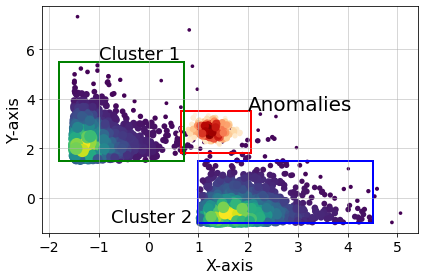

In [116]:
fig, ax = plt.subplots(figsize=[6,4])
z = gaussian_kde(X1.transpose())(X1.transpose())

ax.scatter(X1[:,0], X1[:,1], c=z, s = np.sqrt(z)*200, edgecolor='',cmap='viridis')
z = gaussian_kde(X2.transpose())(X2.transpose())
ax.scatter(X2[:,0], X2[:,1], c=z, s = np.sqrt(z)*200, edgecolor='',cmap='viridis')

z = gaussian_kde(X3.transpose())(X3.transpose())
ax.scatter(X3[:,0], X3[:,1], c=z, s=np.sqrt(z)*50, edgecolor='',cmap='OrRd')


rect_a = patches.Rectangle(
    (0.650,1.8),
    1.4,1.7,
    linewidth=2,
    edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect_a)           
plt.annotate('Anomalies', (2.0,3.550), fontsize=20)

rect_c1 = patches.Rectangle(
    (-1.8,1.5),
    2.5,4,
    linewidth=2,
    edgecolor='g',
    facecolor='none')
ax.add_patch(rect_c1)           
plt.annotate('Cluster 1', (-1,5.6), fontsize=18)

rect_c2 = patches.Rectangle(
    (1,-1),
    3.5,2.5,
    linewidth=2,
    edgecolor='b',
    facecolor='none')
ax.add_patch(rect_c2)           
plt.annotate('Cluster 2', (-0.75,-1), fontsize=18)
plt.xlabel('X-axis',fontsize=16)
plt.ylabel('Y-axis',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(linewidth=0.5)
plt.tight_layout()

plt.savefig('concept_proof_v3.pdf')
plt.show()

In [68]:
fig.show()

In [38]:
x 0.5, 2.25
y 1.8, 3.2

(2, 1000)